# Калибровка моделей.

## Курс "Машинное обучение", программа AI Masters

## Краснов Александр, Илья Карчмит

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(
    20000,
    n_features=20,
    n_informative=18,
    n_redundant=2,
    random_state=0,
    weights=[0.7, 0.3],
    n_clusters_per_class=5,
)
X.shape, y.shape

((20000, 20), (20000,))

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
scaler = StandardScaler().fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((15000, 20), (5000, 20))

In [5]:
y_train.mean(), y_test.mean()

(0.30333333333333334, 0.2974)

In [8]:
from sklearn.svm import LinearSVC
svc = LinearSVC(max_iter=10000, C=0.1, dual=False).fit(X_train, y_train)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100000, C=0.1).fit(X_train, y_train)

In [10]:
lr_raw_lavue = lr.decision_function(X_test)
svc_raw_value = svc.decision_function(X_test)

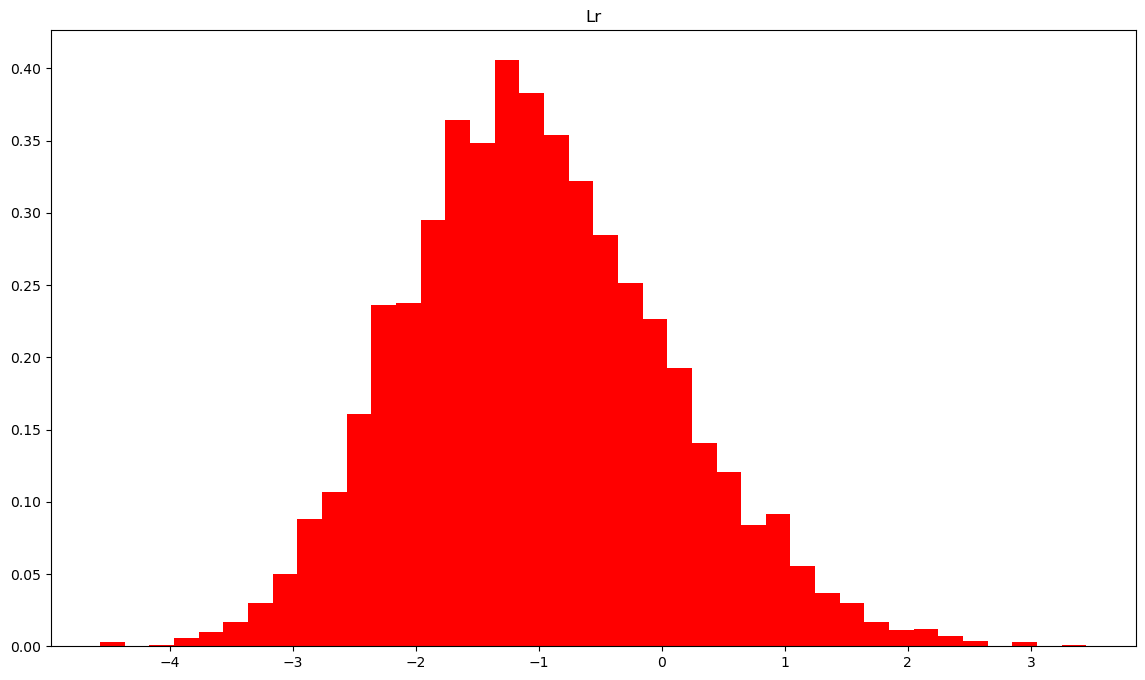

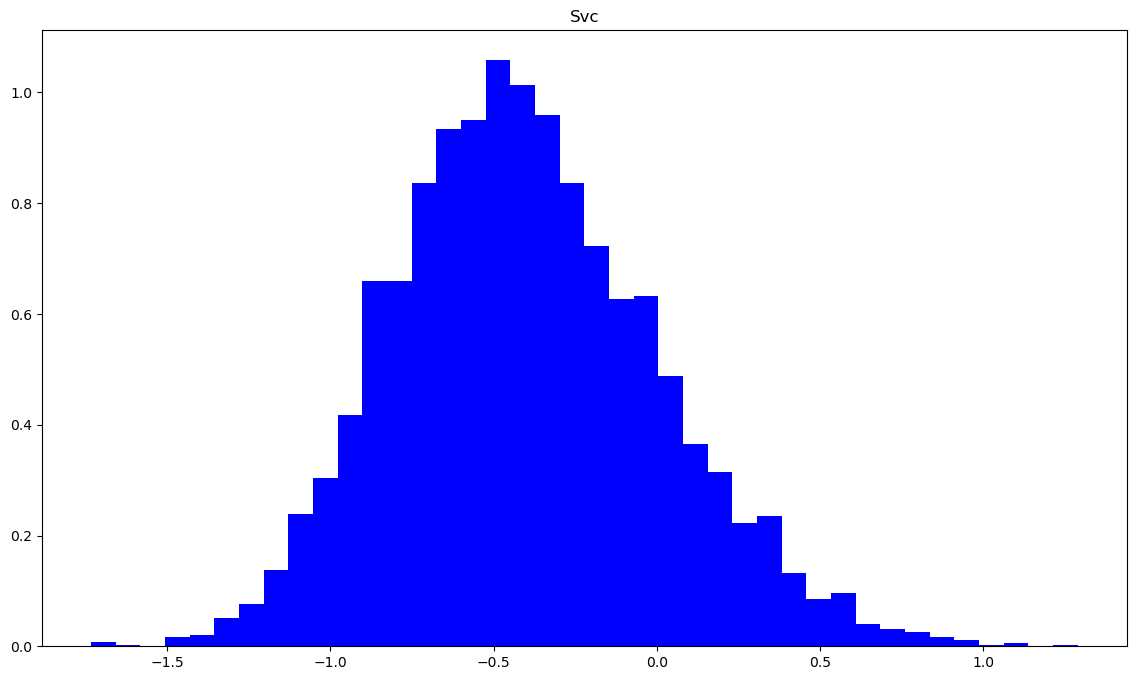

In [11]:
plt.figure(figsize=(14, 8))
plt.hist(lr_raw_lavue, bins=40, color='red', density=True)
plt.title('Lr')
plt.show()
plt.figure(figsize=(14, 8))
plt.hist(svc_raw_value, bins=40, color='blue', density=True)
plt.title('Svc')
plt.show()

Как сделать вероятность?

In [12]:
# переложить на [0, 1]
from sklearn.preprocessing import MinMaxScaler
lr_proba = lr.predict_proba(X_test)[:, 1]
svc_proba = MinMaxScaler().fit_transform(svc.decision_function(X_test).reshape(-1, 1)).ravel()

In [13]:
from sklearn.calibration import calibration_curve

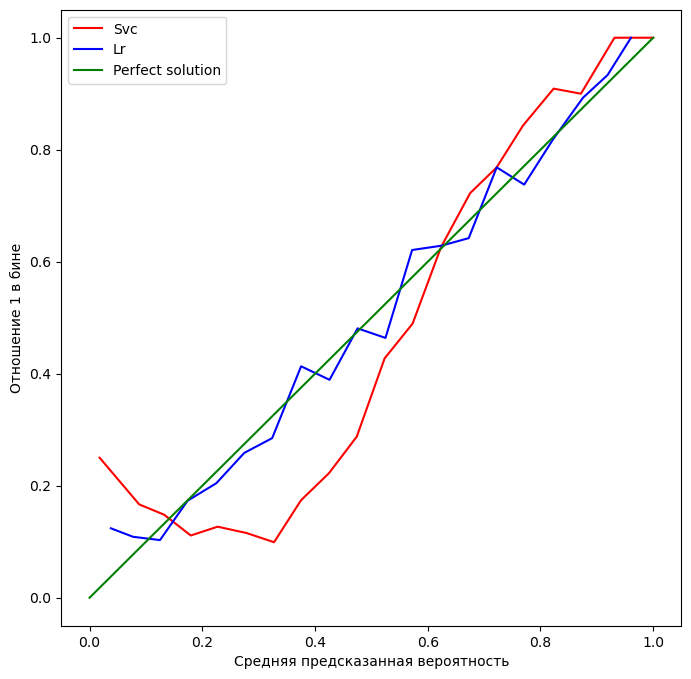

In [14]:
n_bins = 20
svc_bin_true_prob, svc_bin_pred_prob = calibration_curve(y_test, svc_proba, n_bins=n_bins)
lr_bin_true_prob, lr_bin_pred_prob = calibration_curve(y_test, lr_proba, n_bins=n_bins)

plt.figure(figsize=(8, 8))

plt.plot(svc_bin_pred_prob, svc_bin_true_prob, label='Svc', color='red')
plt.plot(lr_bin_pred_prob, lr_bin_true_prob, label='Lr', color='blue')
plt.plot([0, 1], [0, 1], label='Perfect solution', color='green')

plt.xlabel('Средняя предсказанная вероятность')
plt.ylabel('Отношение 1 в бине')
plt.legend()
plt.show()


https://scikit-learn.org/stable/modules/calibration.html#sigmoid

In [15]:
from sklearn.calibration import CalibratedClassifierCV

In [16]:
sigmoid_svc = CalibratedClassifierCV(svc, cv=3, method='sigmoid').fit(X_train, y_train)
sigmoid_svc_proba = sigmoid_svc.predict_proba(X_test)[:, 1]
isotonic_svc = CalibratedClassifierCV(svc, cv=3, method='isotonic').fit(X_train, y_train)
isotonic_svc_proba = isotonic_svc.predict_proba(X_test)[:, 1]
sigmoid_lr = CalibratedClassifierCV(lr, cv=3, method='sigmoid').fit(X_train, y_train)
sigmoid_lr_proba = sigmoid_lr.predict_proba(X_test)[:, 1]
isotonic_lr = CalibratedClassifierCV(lr, cv=3, method='isotonic').fit(X_train, y_train)
isotonic_lr_proba = isotonic_lr.predict_proba(X_test)[:, 1]

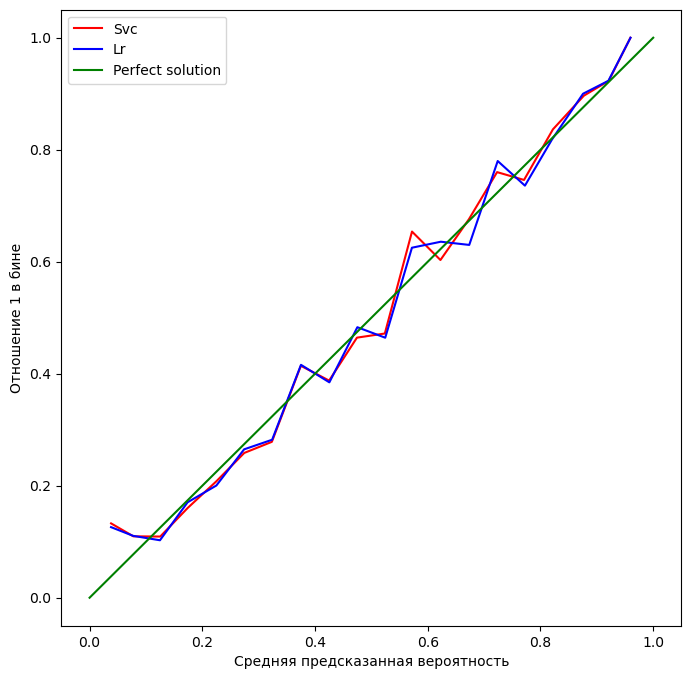

In [17]:
n_bins = 20
svc_bin_true_prob, svc_bin_pred_prob = calibration_curve(y_test, sigmoid_svc_proba, n_bins=n_bins)
lr_bin_true_prob, lr_bin_pred_prob = calibration_curve(y_test, sigmoid_lr_proba, n_bins=n_bins)

plt.figure(figsize=(8, 8))

plt.plot(svc_bin_pred_prob, svc_bin_true_prob, label='Svc', color='red')
plt.plot(lr_bin_pred_prob, lr_bin_true_prob, label='Lr', color='blue')
plt.plot([0, 1], [0, 1], label='Perfect solution', color='green')

plt.xlabel('Средняя предсказанная вероятность')
plt.ylabel('Отношение 1 в бине')
plt.legend()
plt.show()


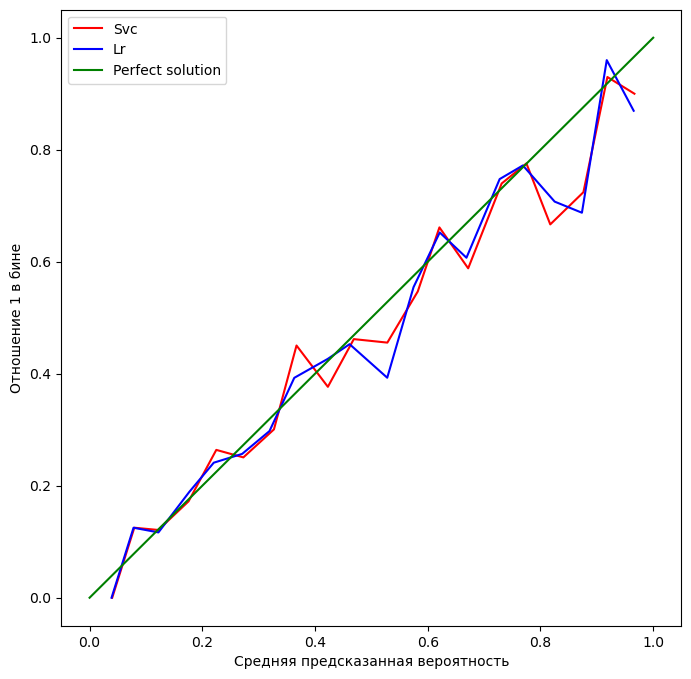

In [18]:
n_bins = 20
svc_bin_true_prob, svc_bin_pred_prob = calibration_curve(y_test, isotonic_svc_proba, n_bins=n_bins)
lr_bin_true_prob, lr_bin_pred_prob = calibration_curve(y_test, isotonic_lr_proba, n_bins=n_bins)

plt.figure(figsize=(8, 8))

plt.plot(svc_bin_pred_prob, svc_bin_true_prob, label='Svc', color='red')
plt.plot(lr_bin_pred_prob, lr_bin_true_prob, label='Lr', color='blue')
plt.plot([0, 1], [0, 1], label='Perfect solution', color='green')

plt.xlabel('Средняя предсказанная вероятность')
plt.ylabel('Отношение 1 в бине')
plt.legend()
plt.show()
